In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
# Set your NASA API key here
api_key = "8rc035yU6MCQBwNcAddDvsjh984kUif03qUHRAYn"

# Define the API URL
base_url = "https://api.nasa.gov/DONKI/CMEAnalysis"

In [20]:
# Define parameters
params = {
    "startDate": "2023-09-01",  # Customize the start date
    "endDate": "2023-09-30",    # Customize the end date
    "mostAccurateOnly": "true",
    "speed": 500,               # Customize the speed lower limit
    "halfAngle": 30,            # Customize the halfAngle lower limit
    "catalog": "ALL",
    "api_key": api_key
}

# Make the API request
response = requests.get(base_url, params=params)


In [21]:
# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Convert the data to a Pandas DataFrame
    df = pd.DataFrame(data)
    
    # Convert time21_5 to datetime format
    df['time21_5'] = pd.to_datetime(df['time21_5'])

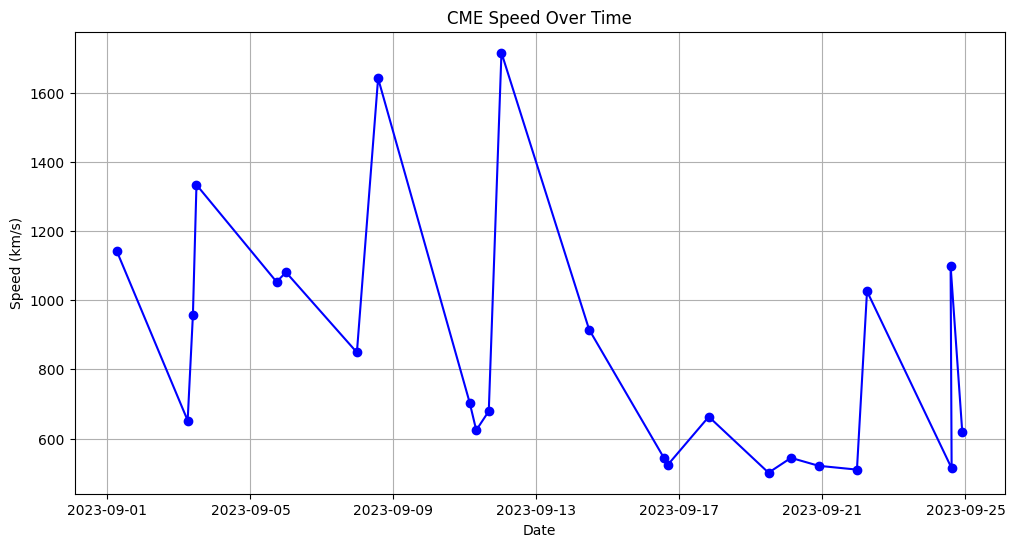

In [22]:
# Create plots or visualizations as needed
# Example: Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['time21_5'], df['speed'], marker='o', linestyle='-', color='b')
plt.title('CME Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Speed (km/s)')
plt.grid(True)
plt.show()

# Check if the request was successful

if response.status_code != 200:
    print("Error in API request. Status code:", response.status_code)


In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [56]:
# Replace 'YOUR_API_KEY' with your actual NASA API key
api_key = '8rc035yU6MCQBwNcAddDvsjh984kUif03qUHRAYn'

# Define the base URL for the NASA DONKI API
base_url = 'https://api.nasa.gov/DONKI'

In [57]:
def get_cme_data(start_date, end_date, most_accurate=True, speed_min=0, half_angle_min=0, catalog='ALL'):
    url = f'{base_url}/CMEAnalysis'
    params = {
        'startDate': start_date,
        'endDate': end_date,
        'mostAccurateOnly': most_accurate,
        'speed': speed_min,
        'halfAngle': half_angle_min,
        'catalog': catalog,
        'api_key': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data


def get_gst_data(start_date, end_date):
    url = f'{base_url}/GST'
    params = {
        'startDate': start_date,
        'endDate': end_date,
        'api_key': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data


In [58]:
# Define the date range for analysis
start_date = '2023-09-01'  # Replace with your desired start date
end_date = '2023-09-30'    # Replace with your desired end date

cme_data = get_cme_data(start_date, end_date)
gst_data = get_gst_data(start_date, end_date)


In [59]:
# Parse CME data into a DataFrame
cme_df = pd.DataFrame(cme_data)

# Parse GST data into a DataFrame
gst_df = pd.DataFrame(gst_data)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provid

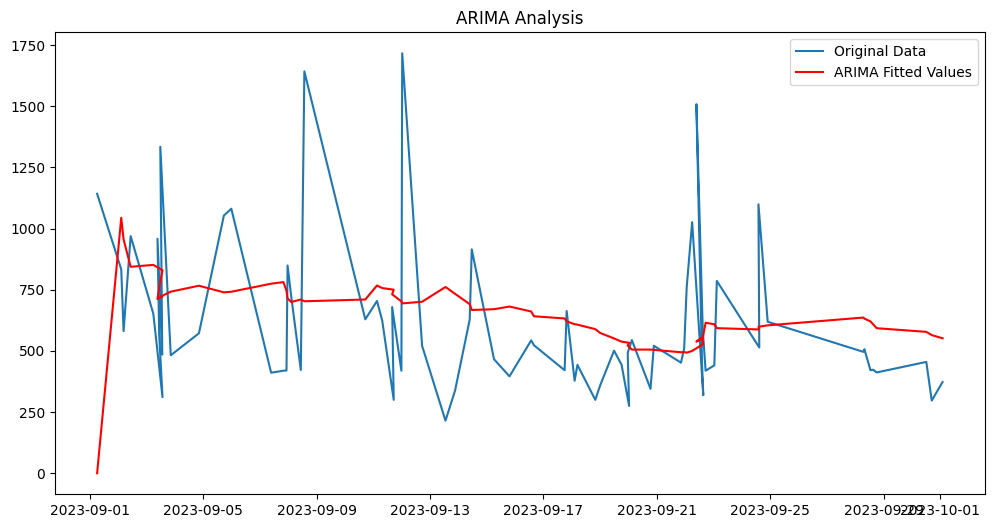

In [60]:
# Assuming you have a time series column named 'time21_5' in your data
cme_df['timestamp'] = pd.to_datetime(cme_df['time21_5'])
cme_df.set_index('timestamp', inplace=True)

# Example ARIMA analysis
# Replace this with your own ARIMA analysis based on your data
model = sm.tsa.ARIMA(cme_df['speed'], order=(
    1, 1, 1))  # Example ARIMA order
results = model.fit()

# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(cme_df['speed'], label='Original Data')
plt.plot(results.fittedvalues, color='red', label='ARIMA Fitted Values')
plt.legend()
plt.title('ARIMA Analysis')
plt.show()


In [61]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [62]:
api_key = "8rc035yU6MCQBwNcAddDvsjh984kUif03qUHRAYn"
cme_url = "https://api.nasa.gov/DONKI/CMEAnalysis"
gst_url = "https://api.nasa.gov/DONKI/GST"

In [63]:
# Define parameters for CME API
cme_params = {
    "startDate": "2023-09-03",
    "endDate": "2023-09-30",
    "mostAccurateOnly": "true",
    "completeEntryOnly": "true",
    "speed": 0,
    "halfAngle": 0,
    "catalog": "ALL",
    "api_key": api_key
}

# Fetch data from CME API
cme_response = requests.get(cme_url, params=cme_params)
cme_data = cme_response.json()

# Extract relevant data
cme_df = pd.DataFrame(cme_data)
cme_df['time21_5'] = pd.to_datetime(cme_df['time21_5'])
cme_df.set_index('time21_5', inplace=True)


In [64]:
# Define parameters for GST API
gst_params = {
    "startDate": "2023-09-03",
    "endDate": "2023-09-30",
    "api_key": api_key
}

# Fetch data from GST API
gst_response = requests.get(gst_url, params=gst_params)
gst_data = gst_response.json()

# Extract relevant data
gst_df = pd.DataFrame(gst_data)
gst_df['startTime'] = pd.to_datetime(gst_df['startTime'])
gst_df.set_index('startTime', inplace=True)


In [66]:
# Sort the CME DataFrame by timestamp
cme_df.sort_index(inplace=True)

# Merge CME and GST data on timestamp
merged_df = pd.merge_asof(cme_df, gst_df, left_index=True,
                          right_index=True, direction="backward")


In [67]:
# Merge CME and GST data on timestamp
merged_df = pd.merge_asof(cme_df, gst_df, left_index=True,
                          right_index=True, direction="backward")


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


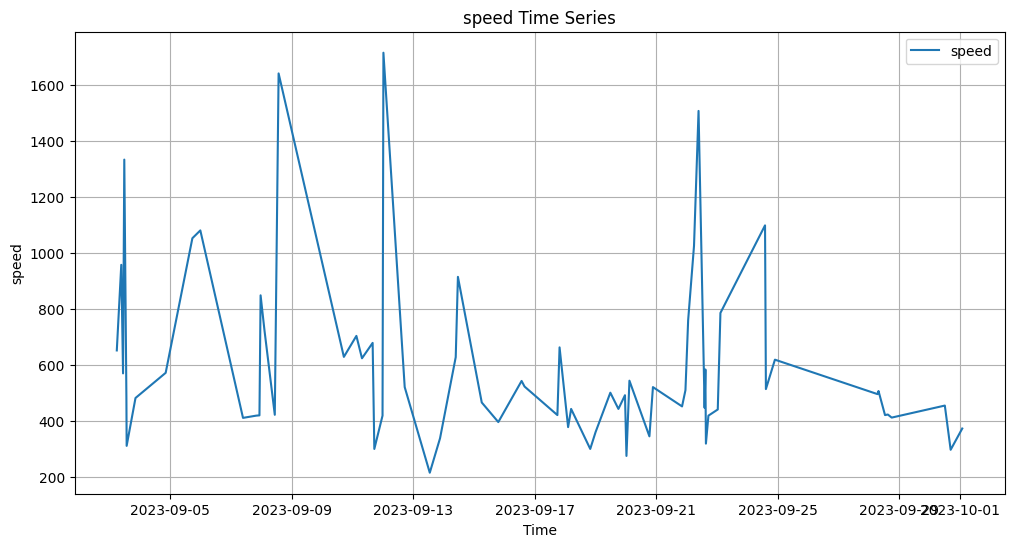

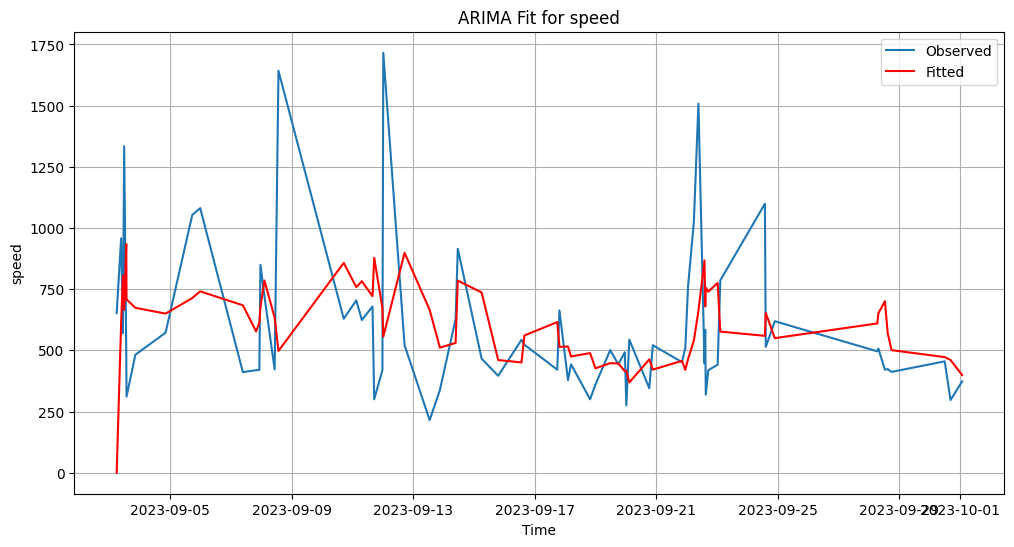

In [73]:
# Define a function to plot ARIMA model
def plot_arima(df, column_name):
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label=column_name)
    plt.title(f"{column_name} Time Series")
    plt.xlabel("Time")
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)

    # Fit an ARIMA model
    model = ARIMA(df[column_name], order=(5, 1, 0))
    model_fit = model.fit()

    # Plot the ARIMA forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label="Observed")
    plt.plot(df.index, model_fit.fittedvalues, color='red', label="Fitted")
    plt.title(f"ARIMA Fit for {column_name}")
    plt.xlabel("Time")
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)


# Plot ARIMA for the 'speed' column
plot_arima(merged_df, 'speed')


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A dat

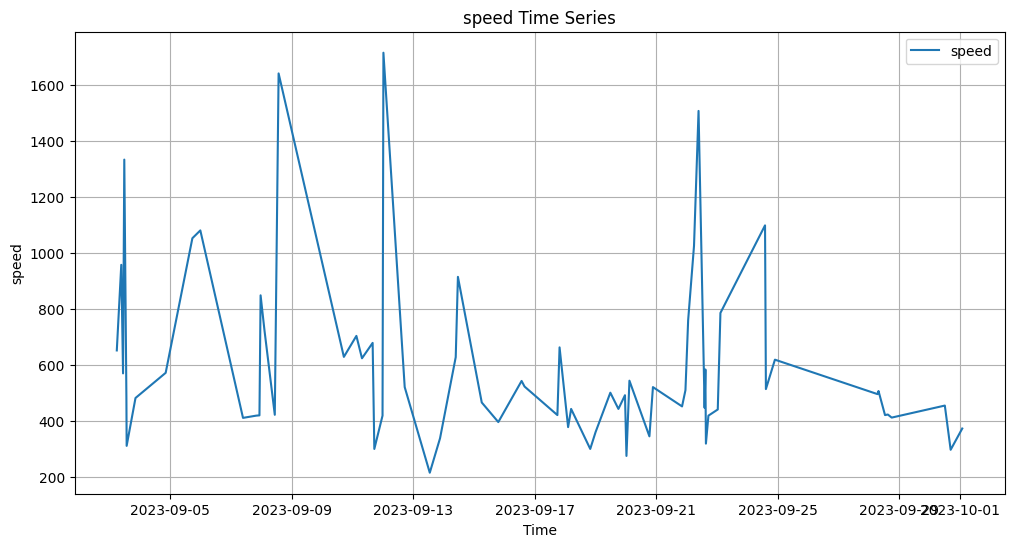

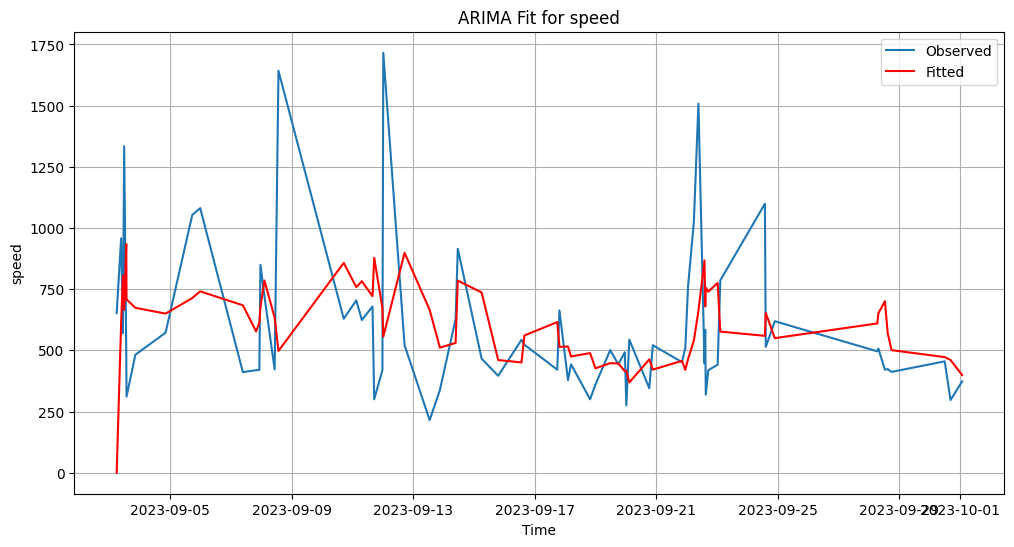

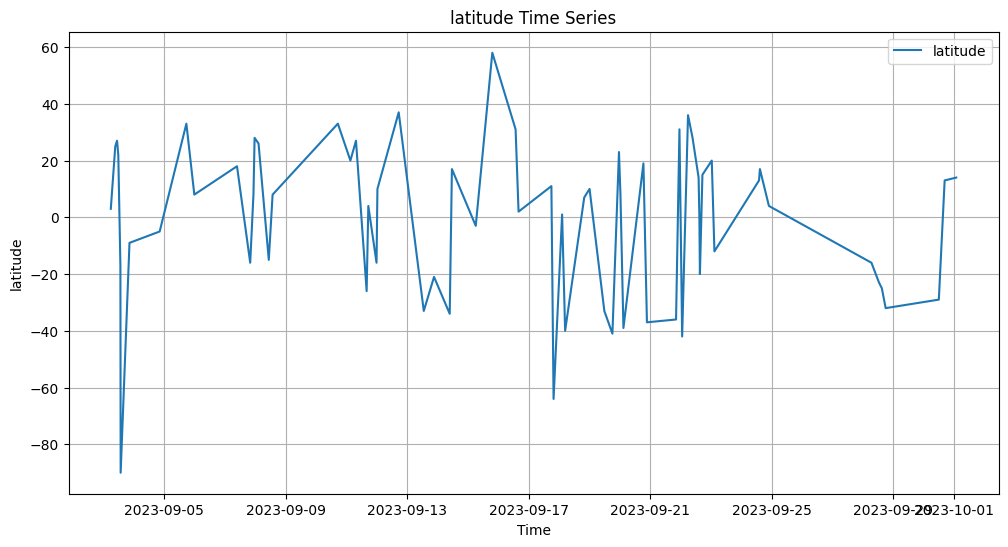

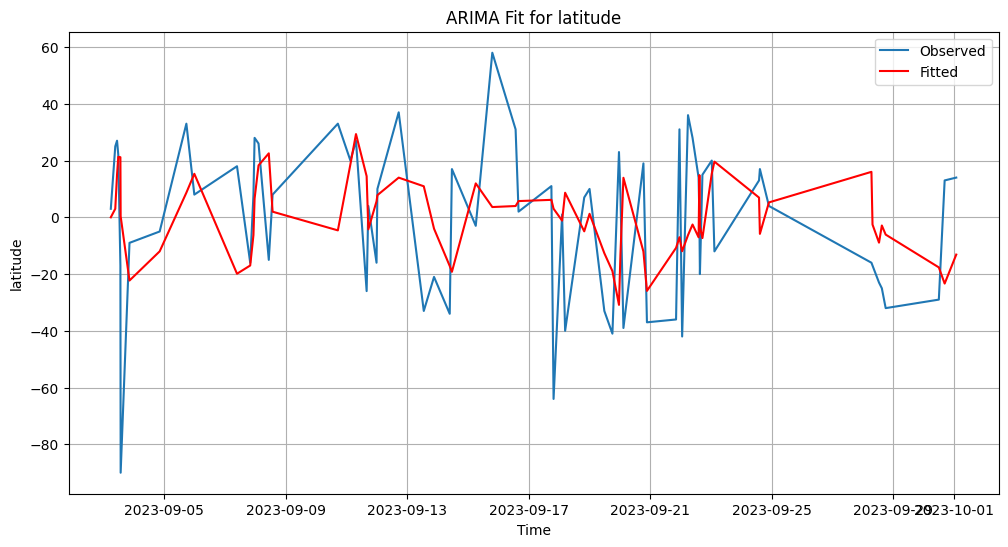

In [71]:
# Define a function to plot ARIMA model
def plot_arima(df, column_name):
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label=column_name)
    plt.title(f"{column_name} Time Series")
    plt.xlabel("Time")
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)
    
    # Fit an ARIMA model
    model = ARIMA(df[column_name], order=(5,1,0))
    model_fit = model.fit()
    
    # Plot the ARIMA forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label="Observed")
    plt.plot(df.index, model_fit.fittedvalues, color='red', label="Fitted")
    plt.title(f"ARIMA Fit for {column_name}")
    plt.xlabel("Time")
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)

# Plot ARIMA for 'speed' and 'latitude' columns
plot_arima(merged_df, 'speed')
plot_arima(merged_df, 'latitude')
